## IMPORT LIBRARIES

In [126]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (20,10)

<h2 style="color: dark pink">Data Load: Load program data into a dataframe</h2> 

In [127]:
df1 = pd.read_csv("newdataset.csv")
df1.head()

,store_type,store,owned/rented,own_rent,city,rating,address,total_sqft,employees,programs,programs_val,Dpmo
0,Departmental Store,2,owned,1,Ghaziabad,2,"Chahrajwala, Grand Trunk Rd, Putligarh, Amrits...",6630.0,30,Locker,3,45
1,Bank,1,rented,2,Gandhinagar,5,"115-117, Jhalawar, Patanwala Indl. Estate,Opp,...",1299.0,5,Locker,3,81
2,Movie theater,6,owned,1,Dwarka,3,"SJRA 230, KOCHI COCHIN ERNAKULAM KERALA, S Jan...",23413.0,8,Locker,3,67
3,Movie theater,6,owned,1,Chandigarh,4,"183, Silver County Road, Kudlu, Bengaluru, Kar...",2800.0,11,Helix,4,3
4,Departmental Store,2,owned,1,Noida,3,"27th Cross Rd, Jayanagar East, Jaya Nagar 1st ...",23413.0,12,IHS,2,12


In [128]:
df1.shape 

(1657, 12)

In [129]:
df1.columns

Index(['store_type', 'store', 'owned/rented', 'own_rent', 'city', 'rating',
       'address', 'total_sqft', 'employees', 'programs', 'programs_val',
       'Dpmo'],
      dtype='object')

In [130]:
df1['store_type'].unique()

array(['Departmental Store', 'Bank', 'Movie theater', 'Pharmacy',
       'Grocery', 'Lifestyle Store', 'Gym', 'Restraunt'], dtype=object)

In [131]:
df1['store_type'].value_counts()

Departmental Store    289
Movie theater         282
Grocery               247
Restraunt             201
Bank                  194
Pharmacy              173
Gym                   160
Lifestyle Store       111
Name: store_type, dtype: int64

<h2 style="color: dark pink"> Data Cleaning : Drop features that are not required to build our model</h2> 

In [132]:
df2 = df1.drop(['store_type','address','owned/rented'],axis='columns')
df2.shape

(1657, 9)

In [133]:
df2.isnull().sum()

store           0
own_rent        0
city            0
rating          0
total_sqft      0
employees       0
programs        0
programs_val    0
Dpmo            0
dtype: int64

In [134]:
df3 = df2.dropna()
df3.isnull().sum()

store           0
own_rent        0
city            0
rating          0
total_sqft      0
employees       0
programs        0
programs_val    0
Dpmo            0
dtype: int64

In [135]:
df3.shape

(1657, 9)

In [136]:
df3['total_sqft'].unique()

array([ 6630. ,  1299. , 23413. ,  2800. , 18002. ,  1800. ,  5100. ,
       11000. , 23452. ,  6362. ,  7875. ,  1686. ,  8880. , 35000. ,
        2837. , 47425. , 20002. ,  1953. , 36125. ,  5677. , 19890. ,
       18234. ,  1527. ,  2309. ,  2141. , 15000. ,  1200. ,  2145. ,
        1143. ,  2001. ,  4492. ,  3945. ,  2838. ,  1514. ,  1830. ,
        2050. , 30875. , 24900. ,  1234. ,  6105. ,  2750. ,  3450. ,
        7270. ,  7275. , 12983. ,  1100. ,  2092. ,  2905. ,  1660. ,
        1899. ,  5690. ,  6390. , 10000. , 15600. ,  4219. , 10638. ,
        9431. ,  7870. ,  7669. , 74767. , 74318.4,  2151. , 12100. ,
       17440. , 10125. ,  2000. ,  1858. ,  2498. ,  2155. , 10620. ,
        1000. ,  2301. , 10077. ,  2363. ,  6100. ,  4000. , 13970. ,
        6636. ,  7918. ,  9230. ,  2852. ,  9860. ,  2140. , 20000. ,
        3864. ,  2296. ,  1728. ,  1817. ,  1142. ,  4940. ,  2178. ,
        2100. , 13750. ,  1295. ,  1566. ,  4494. ,  2529. ,  2214. ,
        1445. ,  742

In [137]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [138]:
df3[~df3['total_sqft'].apply(is_float)].head()

,store,own_rent,city,rating,total_sqft,employees,programs,programs_val,Dpmo


In [139]:
df3['employees'].unique()

array([30,  5,  8, 11, 12, 20,  6, 15, 10, 31, 41,  3, 25,  4, 18, 14,  7,
        9, 23, 13, 17, 32, 24, 40, 21], dtype=int64)

### Remove all the values that are not numeric from total_sqft 

In [140]:
df3.drop(df3[~df3['total_sqft'] .apply(is_float)].index, inplace = True)

In [141]:
df3[~df3['total_sqft'].apply(is_float)].head()

,store,own_rent,city,rating,total_sqft,employees,programs,programs_val,Dpmo


In [142]:
df3[~df3['employees'].apply(is_float)].head()

,store,own_rent,city,rating,total_sqft,employees,programs,programs_val,Dpmo


In [143]:
df3.shape

(1657, 9)

In [144]:
df3['rating'].unique()

array([2, 5, 3, 4, 1], dtype=int64)

In [145]:
df1['rating'].value_counts()

3    729
5    354
2    246
4    202
1    126
Name: rating, dtype: int64

In [146]:
rating_stats = df3['rating'].value_counts(ascending=False)
rating_stats

3    729
5    354
2    246
4    202
1    126
Name: rating, dtype: int64

In [147]:
rating_stats_greater_than_5 = rating_stats[rating_stats<215]
rating_stats_greater_than_5

4    202
1    126
Name: rating, dtype: int64

In [151]:
df1['rating'].value_counts()

3    729
5    354
2    246
4    202
1    126
Name: rating, dtype: int64

In [152]:
df3.head(10)

,store,own_rent,city,rating,total_sqft,employees,programs,programs_val,Dpmo
0,2,1,Ghaziabad,2,6630.0,30,Locker,3,45
1,1,2,Gandhinagar,5,1299.0,5,Locker,3,81
2,6,1,Dwarka,3,23413.0,8,Locker,3,67
3,6,1,Chandigarh,5,2800.0,11,Helix,4,3
4,2,1,Noida,3,23413.0,12,IHS,2,12
5,7,1,Mumbai,5,18002.0,20,3P,1,45
6,3,2,Mumbai,3,23413.0,6,IHS,2,8
7,2,1,Gurgaon,2,1800.0,8,IHS,2,81
8,2,1,Jalandar,2,5100.0,12,3P,1,65
9,5,2,CP,5,11000.0,15,IHS,2,67


In [68]:
#rating_stats_greater_than_5

In [42]:
#df3.drop(df3[df3['rating'] >5].index, inplace = True) error d

<h2 style="color:blue"><h2 style="color: dark pink"> Feature Engineering</h2>

In [153]:
df3_stats = df3['total_sqft'].describe()
df3_stats

count     1657.000000
mean     11514.463488
std      12967.496232
min       1000.000000
25%       2092.000000
50%       7669.000000
75%      18002.000000
max      74767.000000
Name: total_sqft, dtype: float64

**Examine locations which is a categorical variable. We need to apply dimensionality reduction technique here to reduce number of locations**

In [154]:
df3.city = df3.city.apply(lambda x: x.strip())
location_stats = df3['city'].value_counts(ascending=False)
location_stats

Mumbai         304
Noida          279
Gurgaon        270
CP             176
Dwarka         168
Ghaziabad      112
Gandhinagar     67
Chandigarh      60
Karol Bagh      56
Pune            41
Ahemdabad       37
Jalandar        37
Amritsar        27
Nagpur          12
Lucknow          7
Kanpur           4
Name: city, dtype: int64

In [155]:
location_stats.values.sum()

1657

#### Drop all the locations less than 10 and merge to a location other

In [156]:
len(location_stats[location_stats>10])

14

In [157]:
len(location_stats)

16

In [158]:
len(location_stats[location_stats<=10])

2

<h2 style="color:pink">Dimensionality Reduction</h2>

**Any location having less than 10 data points should be tagged as "other" location. This way number of categories can be reduced by huge amount. Later on when we do one hot encoding, it will help us with having fewer dummy columns**

In [159]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

Lucknow    7
Kanpur     4
Name: city, dtype: int64

In [160]:
len(df3.city.unique())

16

In [161]:
df3.city = df3.city.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df3.city.unique())

15

In [162]:
df3.location = df3.city.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df3.city.unique())

C:\Users\Attri\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


15

In [163]:
df3.head(10)

,store,own_rent,city,rating,total_sqft,employees,programs,programs_val,Dpmo
0,2,1,Ghaziabad,2,6630.0,30,Locker,3,45
1,1,2,Gandhinagar,5,1299.0,5,Locker,3,81
2,6,1,Dwarka,3,23413.0,8,Locker,3,67
3,6,1,Chandigarh,5,2800.0,11,Helix,4,3
4,2,1,Noida,3,23413.0,12,IHS,2,12
5,7,1,Mumbai,5,18002.0,20,3P,1,45
6,3,2,Mumbai,3,23413.0,6,IHS,2,8
7,2,1,Gurgaon,2,1800.0,8,IHS,2,81
8,2,1,Jalandar,2,5100.0,12,3P,1,65
9,5,2,CP,5,11000.0,15,IHS,2,67


In [164]:
df3_stats = df3['total_sqft'].describe()
df3_stats

count     1657.000000
mean     11514.463488
std      12967.496232
min       1000.000000
25%       2092.000000
50%       7669.000000
75%      18002.000000
max      74767.000000
Name: total_sqft, dtype: float64

In [165]:
df3.shape

(1657, 9)

<h2 style='color:pink'>Outlier Removal Using Rating Feature</h2>

In [166]:
df4 = df3.copy()

In [167]:
df4['rating'].unique()

array([2, 5, 3, '5'], dtype=object)

TypeError: '<=' not supported between instances of 'int' and 'str'

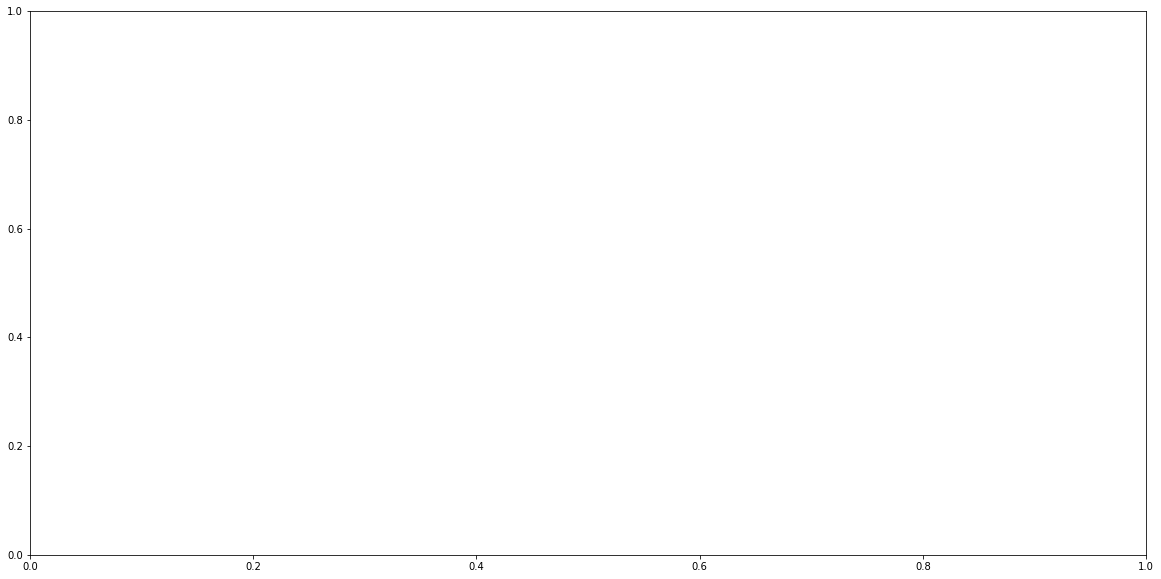

In [168]:
plt.hist(df4['rating'],rwidth=0.8)
plt.xlabel("rating value")
plt.ylabel("Count")

In [169]:
df4.columns

Index(['store', 'own_rent', 'city', 'rating', 'total_sqft', 'employees',
       'programs', 'programs_val', 'Dpmo'],
      dtype='object')

Text(0, 0.5, 'Count')

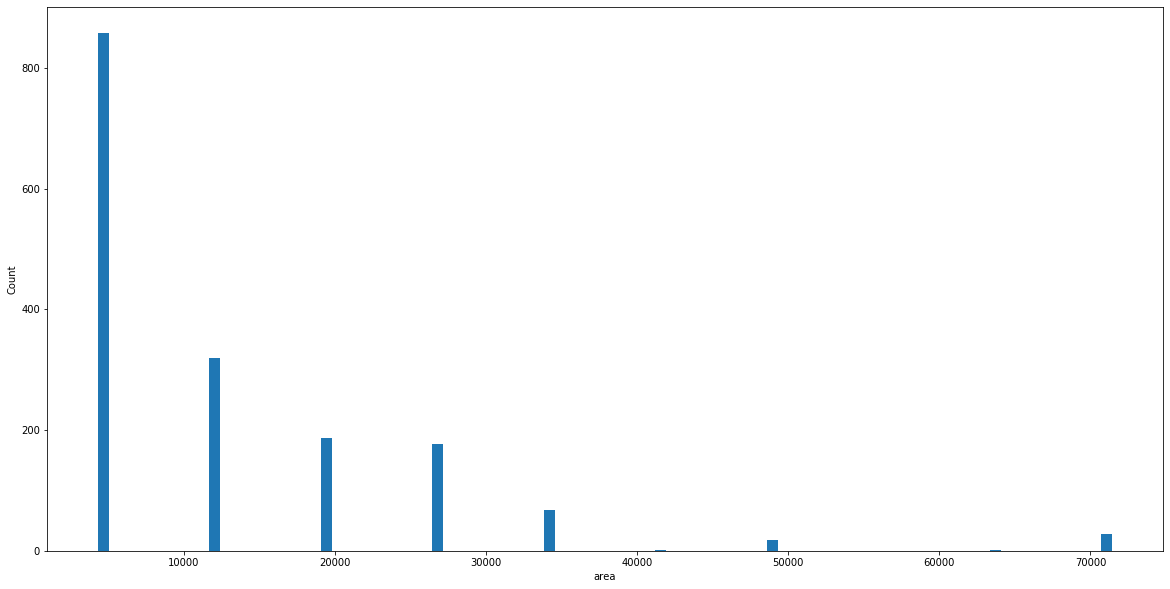

In [170]:
plt.hist(df4['total_sqft'],rwidth=0.1)
plt.xlabel("area")
plt.ylabel("Count")

<h2 style='color:pink'>Use One Hot Encoding For Location</h2>

<h3 style='color:'>ML algo doesn't work with char so do hot encoding to convert it into numerical</h2>

In [171]:
dummies = pd.get_dummies(df4.city)
dummies.head(3)

,Ahemdabad,Amritsar,CP,Chandigarh,Dwarka,Gandhinagar,Ghaziabad,Gurgaon,Jalandar,Karol Bagh,Mumbai,Nagpur,Noida,Pune,other
0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [172]:
df4 = pd.concat([df4,dummies],axis='columns')
df4.head()

,store,own_rent,city,rating,total_sqft,employees,programs,programs_val,Dpmo,Ahemdabad,...,Gandhinagar,Ghaziabad,Gurgaon,Jalandar,Karol Bagh,Mumbai,Nagpur,Noida,Pune,other
0,2,1,Ghaziabad,2,6630.0,30,Locker,3,45,0,...,0,1,0,0,0,0,0,0,0,0
1,1,2,Gandhinagar,5,1299.0,5,Locker,3,81,0,...,1,0,0,0,0,0,0,0,0,0
2,6,1,Dwarka,3,23413.0,8,Locker,3,67,0,...,0,0,0,0,0,0,0,0,0,0
3,6,1,Chandigarh,5,2800.0,11,Helix,4,3,0,...,0,0,0,0,0,0,0,0,0,0
4,2,1,Noida,3,23413.0,12,IHS,2,12,0,...,0,0,0,0,0,0,0,1,0,0


In [173]:
df5 = df4.drop('city',axis='columns')
df5.head(2)

,store,own_rent,rating,total_sqft,employees,programs,programs_val,Dpmo,Ahemdabad,Amritsar,...,Gandhinagar,Ghaziabad,Gurgaon,Jalandar,Karol Bagh,Mumbai,Nagpur,Noida,Pune,other
0,2,1,2,6630.0,30,Locker,3,45,0,0,...,0,1,0,0,0,0,0,0,0,0
1,1,2,5,1299.0,5,Locker,3,81,0,0,...,1,0,0,0,0,0,0,0,0,0


In [174]:
df5.columns

Index(['store', 'own_rent', 'rating', 'total_sqft', 'employees', 'programs',
       'programs_val', 'Dpmo', 'Ahemdabad', 'Amritsar', 'CP', 'Chandigarh',
       'Dwarka', 'Gandhinagar', 'Ghaziabad', 'Gurgaon', 'Jalandar',
       'Karol Bagh', 'Mumbai', 'Nagpur', 'Noida', 'Pune', 'other'],
      dtype='object')

<h2 style='color:pink'>Build a Model Now...</h2>

In [175]:
df5.shape

(1657, 23)

In [176]:
df5.columns

Index(['store', 'own_rent', 'rating', 'total_sqft', 'employees', 'programs',
       'programs_val', 'Dpmo', 'Ahemdabad', 'Amritsar', 'CP', 'Chandigarh',
       'Dwarka', 'Gandhinagar', 'Ghaziabad', 'Gurgaon', 'Jalandar',
       'Karol Bagh', 'Mumbai', 'Nagpur', 'Noida', 'Pune', 'other'],
      dtype='object')

In [177]:
X = df5.drop(['programs'],axis='columns')
X.head(3)

,store,own_rent,rating,total_sqft,employees,programs_val,Dpmo,Ahemdabad,Amritsar,CP,...,Gandhinagar,Ghaziabad,Gurgaon,Jalandar,Karol Bagh,Mumbai,Nagpur,Noida,Pune,other
0,2,1,2,6630.0,30,3,45,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,1,2,5,1299.0,5,3,81,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,6,1,3,23413.0,8,3,67,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [178]:
X.shape

(1657, 22)

In [179]:
y = df5.programs_val
y.head()

0    3
1    3
2    3
3    4
4    2
Name: programs_val, dtype: int64

In [180]:
len(y)

1657

In [181]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [182]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [183]:
from sklearn.model_selection import train_test_split

In [184]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [185]:
model.fit(X_train, y_train)


C:\Users\Attri\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [186]:
model.score(X_test, y_test)


0.40963855421686746

In [187]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

1.0

<h2 style='color:Green'>...Naive Bayes Classifier...</h2>

In [188]:
from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB()

In [189]:
clf.fit(X_train, y_train)

BernoulliNB()

In [190]:
clf.score(X_test, y_test)

0.34036144578313254

In [191]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [192]:
rfclf = RandomForestClassifier(max_depth=2, random_state=0)
rfclf.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [193]:
rfclf.score(X_test, y_test)

0.9156626506024096

<h2 style='color:Green'>...Logistic Regression Classifier...</h2>

In [194]:
from sklearn.linear_model import LogisticRegressionCV
lrclf = LogisticRegressionCV(cv=5, random_state=0)
lrclf.fit(X_train, y_train)

C:\Users\Attri\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Attri\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mo

LogisticRegressionCV(cv=5, random_state=0)

In [195]:
rfclf.score(X_test, y_test)

0.9156626506024096

<h2 style='color:Green'>...Random Forest Classifier...</h2>

In [196]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [197]:
rfclf = RandomForestClassifier(max_depth=2, random_state=0)
rfclf.fit(X_test, y_test)


RandomForestClassifier(max_depth=2, random_state=0)

In [198]:
rfclf.score(X_test, y_test)

0.9156626506024096

## Use K Fold cross validation to measure accuracy of our Random Forest model

In [199]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(RandomForestClassifier() ,X_test, y_test, cv=cv)

array([0.94029851, 0.98507463, 0.94029851, 1.        , 0.97014925])

In [200]:
df5.columns

Index(['store', 'own_rent', 'rating', 'total_sqft', 'employees', 'programs',
       'programs_val', 'Dpmo', 'Ahemdabad', 'Amritsar', 'CP', 'Chandigarh',
       'Dwarka', 'Gandhinagar', 'Ghaziabad', 'Gurgaon', 'Jalandar',
       'Karol Bagh', 'Mumbai', 'Nagpur', 'Noida', 'Pune', 'other'],
      dtype='object')

In [228]:
def predict_program(city,store,own_rent,rating,total_sqft,employees,Dpmo):    
    loc_index = np.where(X.columns==city)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = store
    x[1] = own_rent
    x[2] = rating
    x[3] = total_sqft
    x[4] = employees
    x[5] = Dpmo
    if loc_index >= 0:
        x[loc_index] = 1

    return clf.predict([x])[0]

`x_train`, `x_test`: training and test feature matrices of size `(n_samples, n_features)`
`y_train`, `y_test`: training and test label matrices of size `(n_samples, n_labels)`

In [244]:
predict_program('Noida',1, 1,3, 3900, 60,7)

3

In [245]:
predict_program('Dwarka',3, 1,3, 300, 60,7)

4

<h2 style='color:pink'>Export the tested model to a pickle file</h2>

In [246]:
import pickle
with open('ev_program_prediction.pickle','wb') as f:
    pickle.dump(clf,f)

In [247]:
with open('ev_program_prediction.pickle','rb') as f:
    mp=pickle.load(f)

<h2 style='color:pink'>Export location and column information to a file that will be useful later on in our prediction application</h2>

In [249]:
import json
columns = {
    'data_columns' : [col.lower() for col in df5.columns]
}
with open("ev_columns.json","w") as f:
    f.write(json.dumps(columns))